In [60]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arun\Downloads\Churn_Modelling.csv")
df.shape

(10000, 14)

In [38]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


In [39]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# from ydata_profiling import ProfileReport
# repr=ProfileReport(df,explorative=True)
# repr.to_notebook_iframe()


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x["Geography"]=encoder.fit_transform(x["Geography"])
x["Gender"]=encoder.fit_transform(x["Gender"])

x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [42]:
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape


(7000, 10)

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model=  Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=10))
model.add(Dense(1,activation="sigmoid"))

In [45]:
with tf.device("/CPU:0"):
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 33        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [47]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=64)

Epoch 1/100
88/88 [==============================] - 1s 6ms/step - loss: 0.5572 - accuracy: 0.7920 - val_loss: 0.5412 - val_accuracy: 0.7943
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.7920 - val_loss: 0.5222 - val_accuracy: 0.7943
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7920 - val_loss: 0.5072 - val_accuracy: 0.7943
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.5078 - accuracy: 0.7920 - val_loss: 0.4953 - val_accuracy: 0.7943
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7920 - val_loss: 0.4857 - val_accuracy: 0.7943
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7920 - val_loss: 0.4778 - val_accuracy: 0.7943
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7920 - val_loss: 0.4713 - val_accuracy: 0.7943
Epoch 8/100
8

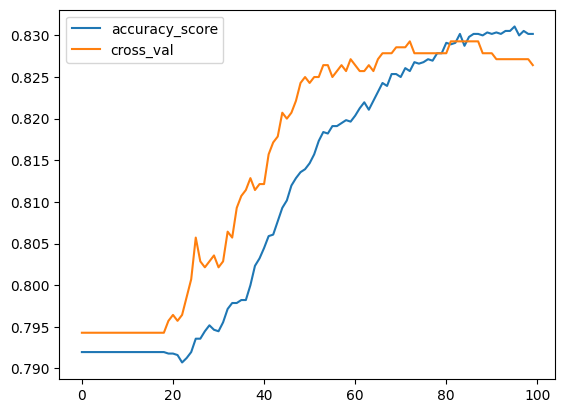

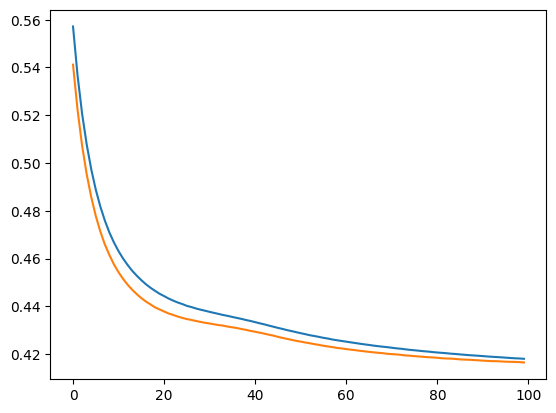

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["accuracy"],label="accuracy_score")
plt.plot(history.history["val_accuracy"],label="cross_val")
plt.legend()
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [53]:
prd=model.predict(x_test)
prd = (prd > 0.5).astype("int32")

94/94 [==============================] - 0s 1ms/step


In [54]:
print(min(prd))
print(max(prd))

[0]
[1]


In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,prd))
print(classification_report(y_test,prd))
print(confusion_matrix(y_test,prd))

0.8423333333333334
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2416
           1       0.75      0.29      0.42       584

    accuracy                           0.84      3000
   macro avg       0.80      0.63      0.66      3000
weighted avg       0.83      0.84      0.81      3000

[[2359   57]
 [ 416  168]]


In [58]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(task_type="GPU",devices="0")
cat.fit(x_train,y_train)
pred=cat.predict(x_test)

Learning rate set to 0.03029
0:	learn: 0.6680848	total: 88.3ms	remaining: 1m 28s
1:	learn: 0.6460983	total: 116ms	remaining: 57.8s
2:	learn: 0.6245400	total: 146ms	remaining: 48.6s
3:	learn: 0.6054559	total: 173ms	remaining: 43.2s
4:	learn: 0.5870554	total: 215ms	remaining: 42.7s
5:	learn: 0.5694000	total: 241ms	remaining: 40s
6:	learn: 0.5560506	total: 276ms	remaining: 39.1s
7:	learn: 0.5421235	total: 308ms	remaining: 38.1s
8:	learn: 0.5278920	total: 341ms	remaining: 37.6s
9:	learn: 0.5163059	total: 371ms	remaining: 36.7s
10:	learn: 0.5035873	total: 400ms	remaining: 35.9s
11:	learn: 0.4927796	total: 428ms	remaining: 35.2s
12:	learn: 0.4829616	total: 456ms	remaining: 34.6s
13:	learn: 0.4736716	total: 484ms	remaining: 34.1s
14:	learn: 0.4651378	total: 521ms	remaining: 34.2s
15:	learn: 0.4577674	total: 549ms	remaining: 33.8s
16:	learn: 0.4514973	total: 579ms	remaining: 33.5s
17:	learn: 0.4439915	total: 608ms	remaining: 33.2s
18:	learn: 0.4379144	total: 637ms	remaining: 32.9s
19:	learn: 0

In [59]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.876
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2416
           1       0.80      0.49      0.60       584

    accuracy                           0.88      3000
   macro avg       0.84      0.73      0.77      3000
weighted avg       0.87      0.88      0.86      3000

[[2344   72]
 [ 300  284]]
